# W3P2 - PART5 - model_building

assignment file part 4

----

Build a regression model.

In [388]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# sns.set(color_codes=True)
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [389]:
df_yelpStns = pd.read_csv('../data/stats_mod/df_yelpStns_1130h.csv')
dfy= df_yelpStns.copy()

df_fsqStns = pd.read_csv('../data/stats_mod/df_fsqStns_1130h.csv')
dff= df_fsqStns.copy()

df_ctyBks = pd.read_csv('../data/ctyBks_csv/df_ctybks_toronto(mon1130).csv')
dfcb = df_ctyBks.copy()
# dfcb = dfcb[['free_bikes', 'empty_slots', 'slots', 'altitude',
#        'ebikes', 'has_ebikes', 'normal_bikes', 'renting', 'returning', 'uid',
#        'Updated', 'lat-long']]

-----
right now (5am in toronto), a closer look at the station data:

In [390]:
dfcb.head(3)

name  free_bikes  empty_slots  slots  altitude  \
0    Queen St E / Woodward Ave          19            0     19       0.0   
1  Primrose Ave / Davenport Rd           5            9     15       0.0   
2    Queen St. E / Rhodes Ave.          10           12     23       0.0   

   ebikes  has_ebikes  normal_bikes  \
0       0        True            19   
1       0        True             5   
2       0        True            10   

                                         payment  payment-terminal  renting  \
0  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
1  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
2  ['key', 'transitcard', 'creditcard', 'phone']              True        1   

   returning   uid  last_updated                      address  \
0          1  7303    1670257324    Queen St E / Woodward Ave   
1          1  7301    1670257335  Primrose Ave / Davenport Rd   
2          1  7309    1670257430    Queen St. E / Rhodes Ave.   

                     timestamp   latitude  longitude  \
0  2022-12-05T16:24:56.434000Z  43.665269 -79.319796   
1  2022-12-05T16:24:56.435000Z  43.671420 -79.445947   
2  2022-12-05T16:24:56.436000Z  43.666224 -79.317693   

                                 id  
0  fb337bbed72e2be090071e199899b2be  
1  4ff88d5880e71aa40d34cfe5d09b0ca7  
2  a09c67c0b419654d907c9134b108e328

In [391]:
dfcb['perc_avail'] = round(dfcb['free_bikes']/dfcb['slots'], 2)
dfcb.head()

name  free_bikes  empty_slots  slots  altitude  \
0    Queen St E / Woodward Ave          19            0     19       0.0   
1  Primrose Ave / Davenport Rd           5            9     15       0.0   
2    Queen St. E / Rhodes Ave.          10           12     23       0.0   
3         Bond St / Queen St E           5           19     25       0.0   
4     Church St / Alexander St           0           12     15       0.0   

   ebikes  has_ebikes  normal_bikes  \
0       0        True            19   
1       0        True             5   
2       0        True            10   
3       0        True             5   
4       0        True             0   

                                         payment  payment-terminal  renting  \
0  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
1  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
2  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
3  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
4  ['key', 'transitcard', 'creditcard', 'phone']              True        1   

   returning   uid  last_updated                      address  \
0          1  7303    1670257324    Queen St E / Woodward Ave   
1          1  7301    1670257335  Primrose Ave / Davenport Rd   
2          1  7309    1670257430    Queen St. E / Rhodes Ave.   
3          1  7045    1670257378         Bond St / Queen St E   
4          1  7044    1670257456     Church St / Alexander St   

                     timestamp   latitude  longitude  \
0  2022-12-05T16:24:56.434000Z  43.665269 -79.319796   
1  2022-12-05T16:24:56.435000Z  43.671420 -79.445947   
2  2022-12-05T16:24:56.436000Z  43.666224 -79.317693   
3  2022-12-05T16:24:56.446000Z  43.653236 -79.376716   
4  2022-12-05T16:24:56.447000Z  43.663722 -79.380288   

                                 id  perc_avail  
0  fb337bbed72e2be090071e199899b2be        1.00  
1  4ff88d5880e71aa40d34cfe5d09b0ca7        0.33  
2  a09c67c0b419654d907c9134b108e328        0.43  
3  d6a9daee68070a8b106cfb598d81308c        0.20  
4  8f8af40d9388c8a3962559e8681d3db7        0.00

In [392]:
dfcb[['perc_avail']]

perc_avail
0          1.00
1          0.33
2          0.43
3          0.20
4          0.00
..          ...
650        1.00
651        0.94
652        0.56
653        0.68
654        0.00

[655 rows x 1 columns]

----

In [393]:
yorkUniversity = [7759, 7758, 7756, 7679, 7585, 7586, 7584, 7759, 7679, 7678, 7587, 7588, 7589, 7590]
yorkUni = (7759, 7758, 7756, 7679, 7585, 7586, 7584, 7759, 7679, 7678, 7587, 7588, 7589, 7590)

scarboroughUni = [7612, 7613, 7624, 7614, 7615, 7616, 7617, 7645, 7626]
scarUni = (7612, 7613, 7624, 7614, 7615, 7616, 7617, 7645, 7626)

uni = (7612, 7613, 7624, 7614, 7615, 7616, 7617, 7645, 7626, 7759, 7758, 7756, 7679, 7585, 7586, 7584, 7759, 7679, 7678, 7587, 7588, 7589, 7590)

In [394]:
swPark = (7621, 7622, 7552, 7553, 7554, 7630, 7623, 7555, 7515, 7516, 7556, 7637, 7471, 7760, 7753, 7288, 7514, 7289, 7557)

In [395]:
dff.head(10)


free_bikes  empty_slots  slots  altitude  ebikes  normal_bikes  renting  \
0          19            0     19       0.0       0            19        1   
1          19            0     19       0.0       0            19        1   
2          19            0     19       0.0       0            19        1   
3          19            0     19       0.0       0            19        1   
4          19            0     19       0.0       0            19        1   
5          19            0     19       0.0       0            19        1   
6          19            0     19       0.0       0            19        1   
7          19            0     19       0.0       0            19        1   
8          19            0     19       0.0       0            19        1   
9          19            0     19       0.0       0            19        1   

   returning   uid Updated                        name  distance  popularity  \
0          1  7303   1824h  Leslieville Farmers Market        40    0.868580   
1          1  7303   1824h                  McDonald's        62    0.995501   
2          1  7303   1824h     Jonathan Ashbridge Park        63    0.952623   
3          1  7303   1824h      Ashdale Medical Centre        73    0.575147   
4          1  7303   1824h                 Chick-N-Joy       129    0.035783   
5          1  7303   1824h           Rorschach Brewing       194    0.984511   
6          1  7303   1824h                   Velotique       186    0.968785   
7          1  7303   1824h    Energy Plus Snow Removal        51         NaN   
8          1  7303   1824h    Forest Hill Snow Removal        51         NaN   
9          1  7303   1824h                    Allman D        51         NaN   

   open_now  rating                      my_timestamp  cat1_id  \
0     False     8.6  2022-12-05 11:31:42.842959-05:00  17065.0   
1      True     7.4  2022-12-05 11:31:42.842978-05:00  16037.0   
2     False     NaN  2022-12-05 11:31:42.842985-05:00  17119.0   
3      True     NaN  2022-12-05 11:31:42.842992-05:00  13309.0   
4      True     6.9  2022-12-05 11:31:42.842999-05:00  13276.0   
5     False     8.3  2022-12-05 11:31:42.843007-05:00  17018.0   
6      True     8.0  2022-12-05 11:31:42.843014-05:00  13059.0   
7     False     NaN  2022-12-05 11:31:42.843020-05:00  13026.0   
8     False     NaN  2022-12-05 11:31:42.843028-05:00  13065.0   
9     False     NaN  2022-12-05 11:31:42.843034-05:00  13236.0   

                   cat1_name  
0            Farmers' Market  
1                 Playground  
2              Bicycle Store  
3  Middle Eastern Restaurant  
4           Sushi Restaurant  
5                  Bookstore  
6                  Juice Bar  
7                  BBQ Joint  
8                 Restaurant  
9         Italian Restaurant

In [396]:
dfy.head(10)

free_bikes  empty_slots  slots  altitude  ebikes  normal_bikes  renting  \
0          19            0     19       0.0       0            19        1   
1          19            0     19       0.0       0            19        1   
2          19            0     19       0.0       0            19        1   
3          19            0     19       0.0       0            19        1   
4          19            0     19       0.0       0            19        1   
5          19            0     19       0.0       0            19        1   
6          19            0     19       0.0       0            19        1   
7          19            0     19       0.0       0            19        1   
8          19            0     19       0.0       0            19        1   
9          19            0     19       0.0       0            19        1   

   returning   uid                 name  distance  price  is_open  rating  \
0          1  7303  The Burger's Priest     374.2    2.0     True     3.5   
1          1  7303          Chick-N-Joy     125.5    1.0     True     4.0   
2          1  7303              O Sushi     277.6    2.0     True     4.0   
3          1  7303             Jaclyn's     172.4    3.0     True     4.5   
4          1  7303     Burrito Bandidos     286.2    2.0     True     3.5   
5          1  7303           Dulcinella     308.9    3.0     True     5.0   
6          1  7303           McDonald's      64.2    1.0     True     2.5   
7          1  7303       Rice Rice Baby     199.8    3.0     True     5.0   
8          1  7303  Butter Chicken Roti     269.9    3.0     True     2.5   
9          1  7303        Simple Coffee     377.7    3.0     True     4.5   

   rating_count                      my_timestamp      cat1_title  
0           498  2022-12-05 11:45:56.457144-05:00         Burgers  
1            54  2022-12-05 11:45:56.457151-05:00    Chicken Shop  
2            57  2022-12-05 11:45:56.457153-05:00         Burgers  
3            14  2022-12-05 11:45:56.457155-05:00  Canadian (New)  
4            57  2022-12-05 11:45:56.457157-05:00        Japanese  
5             7  2022-12-05 11:45:56.457159-05:00           Ramen  
6            22  2022-12-05 11:45:56.457160-05:00         Chinese  
7             2  2022-12-05 11:45:56.457162-05:00        Bakeries  
8            13  2022-12-05 11:45:56.457164-05:00      Sandwiches  
9             2  2022-12-05 11:45:56.457166-05:00         Seafood

In [397]:

dfcb[dfcb['uid'].isin(uni)]

name  free_bikes  empty_slots  \
408                     The Pond Rd / Sentinel Rd           6           19   
409            Sentinel Rd / Finch Hydro Corridor          15           12   
410                     Finch West Subway Station          20            3   
411  Dufferin St / Finch Hydro Recreational Trail           4           15   
412                              G Ross Lord Park          14           17   
429                  Guildwood GO Station (South)           3            7   
434                Starspray Ave / Lawrence Ave E          10           13   
435                         Rouge Hill GO Station           9           16   
436                         Colonel Danforth Park          11           15   
437       Morningside Park (Highland Creek Trail)           0           23   
438                Livingston Rd / Guildwood Pkwy           6           13   
439          Livingston Rd (Highland Creek Trail)          12           15   
450                   Torresdale Ave / Antibes Dr           6            7   
451                         Esther Shiner Stadium           6           16   
471             University of Toronto Scarborough           2           14   
476                 Waterfront Trail (Rouge Hill)           1           18   
541       York University Station (South) - SMART           5           11   
596               York University Station (North)           4           11   
650  Tobemory Dr / Finch Hydro Recreational Trail          18            0   
652             Driftwood Ave / Finch Hydro Trail          10            8   
654                     The Pond Rd / Shoreham Dr           0           14   

     slots  altitude  ebikes  has_ebikes  normal_bikes  \
408     27       0.0       0        True             6   
409     27       0.0       0        True            15   
410     23       0.0       0        True            20   
411     19       0.0       0        True             4   
412     31       0.0       0        True            14   
429     11       0.0       0        True             3   
434     23       0.0       0        True            10   
435     25       0.0       0        True             9   
436     27       0.0       0        True            11   
437     23       0.0       0        True             0   
438     19       0.0       0        True             6   
439     27       0.0       0        True            12   
450     15       0.0       0        True             6   
451     23       0.0       0        True             6   
471     16       0.0       0        True             2   
476     19       0.0       0        True             1   
541     16       0.0       0        True             5   
596     15       0.0       0        True             4   
650     18       0.0       0        True            18   
652     18       0.0       0        True            10   
654     15       0.0       0        True             0   

                                           payment  payment-terminal  renting  \
408  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
409  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
410  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
411  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
412  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
429  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
434  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
435  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
436  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
437  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
438  ['key', 'transitcard', 'creditcard', 'phone']              True        1   
439  ['key', 'transitcard', 'creditcard', 'phone']              True        1  

In [398]:


print(dfy.shape)
print(dfy.dtypes)
dfy.head(5)

(18659, 17)
free_bikes        int64
empty_slots       int64
slots             int64
altitude        float64
ebikes            int64
normal_bikes      int64
renting           int64
returning         int64
uid               int64
name             object
distance        float64
price           float64
is_open            bool
rating          float64
rating_count      int64
my_timestamp     object
cat1_title       object
dtype: object


free_bikes  empty_slots  slots  altitude  ebikes  normal_bikes  renting  \
0          19            0     19       0.0       0            19        1   
1          19            0     19       0.0       0            19        1   
2          19            0     19       0.0       0            19        1   
3          19            0     19       0.0       0            19        1   
4          19            0     19       0.0       0            19        1   

   returning   uid                 name  distance  price  is_open  rating  \
0          1  7303  The Burger's Priest     374.2    2.0     True     3.5   
1          1  7303          Chick-N-Joy     125.5    1.0     True     4.0   
2          1  7303              O Sushi     277.6    2.0     True     4.0   
3          1  7303             Jaclyn's     172.4    3.0     True     4.5   
4          1  7303     Burrito Bandidos     286.2    2.0     True     3.5   

   rating_count                      my_timestamp      cat1_title  
0           498  2022-12-05 11:45:56.457144-05:00         Burgers  
1            54  2022-12-05 11:45:56.457151-05:00    Chicken Shop  
2            57  2022-12-05 11:45:56.457153-05:00         Burgers  
3            14  2022-12-05 11:45:56.457155-05:00  Canadian (New)  
4            57  2022-12-05 11:45:56.457157-05:00        Japanese

In [399]:
dfy['is_open'].value_counts()

True    18659
Name: is_open, dtype: int64

In [400]:
# order in array above will be same as the keys,
keys = dfy['is_open'].unique()
# Setting ordinal numerical values to match the order:
values = [1]
open_map = dict(zip(keys, values))
open_map

{True: 1}

In [401]:
dfy['is_open'] = dfy['is_open'].map(open_map)

In [402]:
dff.head()

free_bikes  empty_slots  slots  altitude  ebikes  normal_bikes  renting  \
0          19            0     19       0.0       0            19        1   
1          19            0     19       0.0       0            19        1   
2          19            0     19       0.0       0            19        1   
3          19            0     19       0.0       0            19        1   
4          19            0     19       0.0       0            19        1   

   returning   uid Updated                        name  distance  popularity  \
0          1  7303   1824h  Leslieville Farmers Market        40    0.868580   
1          1  7303   1824h                  McDonald's        62    0.995501   
2          1  7303   1824h     Jonathan Ashbridge Park        63    0.952623   
3          1  7303   1824h      Ashdale Medical Centre        73    0.575147   
4          1  7303   1824h                 Chick-N-Joy       129    0.035783   

   open_now  rating                      my_timestamp  cat1_id  \
0     False     8.6  2022-12-05 11:31:42.842959-05:00  17065.0   
1      True     7.4  2022-12-05 11:31:42.842978-05:00  16037.0   
2     False     NaN  2022-12-05 11:31:42.842985-05:00  17119.0   
3      True     NaN  2022-12-05 11:31:42.842992-05:00  13309.0   
4      True     6.9  2022-12-05 11:31:42.842999-05:00  13276.0   

                   cat1_name  
0            Farmers' Market  
1                 Playground  
2              Bicycle Store  
3  Middle Eastern Restaurant  
4           Sushi Restaurant

In [403]:
dff['perc_avail'] = dff['free_bikes']/dff['slots']
dff

free_bikes  empty_slots  slots  altitude  ebikes  normal_bikes  \
0              19            0     19       0.0       0            19   
1              19            0     19       0.0       0            19   
2              19            0     19       0.0       0            19   
3              19            0     19       0.0       0            19   
4              19            0     19       0.0       0            19   
...           ...          ...    ...       ...     ...           ...   
29950           0           14     15       0.0       0             0   
29951           0           14     15       0.0       0             0   
29952           0           14     15       0.0       0             0   
29953           0           14     15       0.0       0             0   
29954           0           14     15       0.0       0             0   

       renting  returning   uid Updated                        name  distance  \
0            1          1  7303   1824h  Leslieville Farmers Market        40   
1            1          1  7303   1824h                  McDonald's        62   
2            1          1  7303   1824h     Jonathan Ashbridge Park        63   
3            1          1  7303   1824h      Ashdale Medical Centre        73   
4            1          1  7303   1824h                 Chick-N-Joy       129   
...        ...        ...   ...     ...                         ...       ...   
29950        1          1  7759   1824h  Canlan Ice Sports - Rink 1       244   
29951        1          1  7759   1824h    Canlan Ice Sports Rink 2       251   
29952        1          1  7759   1824h            Orange Snail Pub       258   
29953        1          1  7759   1824h         Thirsty Penguin Bar       276   
29954        1          1  7759   1824h          Mcguire Hockey Inc       279   

       popularity  open_now  rating                      my_timestamp  \
0        0.868580     False     8.6  2022-12-05 11:31:42.842959-05:00   
1        0.995501      True     7.4  2022-12-05 11:31:42.842978-05:00   
2        0.952623     False     NaN  2022-12-05 11:31:42.842985-05:00   
3        0.575147      True     NaN  2022-12-05 11:31:42.842992-05:00   
4        0.035783      True     6.9  2022-12-05 11:31:42.842999-05:00   
...           ...       ...     ...                               ...   
29950    0.890255     False     NaN  2022-12-05 11:38:53.564332-05:00   
29951    0.958492     False     NaN  2022-12-05 11:38:53.564339-05:00   
29952    0.916025     False     NaN  2022-12-05 11:38:53.564345-05:00   
29953         NaN      True     NaN  2022-12-05 11:38:53.564352-05:00   
29954         NaN     False     NaN  2022-12-05 11:38:53.564361-05:00   

       cat1_id                  cat1_name  perc_avail  
0      17065.0            Farmers' Market         1.0  
1      16037.0                 Playground         1.0  
2      17119.0              Bicycle Store         1.0  
3      13309.0  Middle Eastern Restaurant         1.0  
4      13276.0           Sushi Restaurant         1.0  
...        ...                        ...         ...  
29950  13276.0           Sushi Restaurant         0.0  
29951  17018.0                  Bookstore         0.0  
29952  13059.0                  Juice Bar         0.0  
29953  13026.0                  BBQ Joint         0.0  
29954  13065.0                 Restaurant         0.0  

[29955 rows x 19 columns]

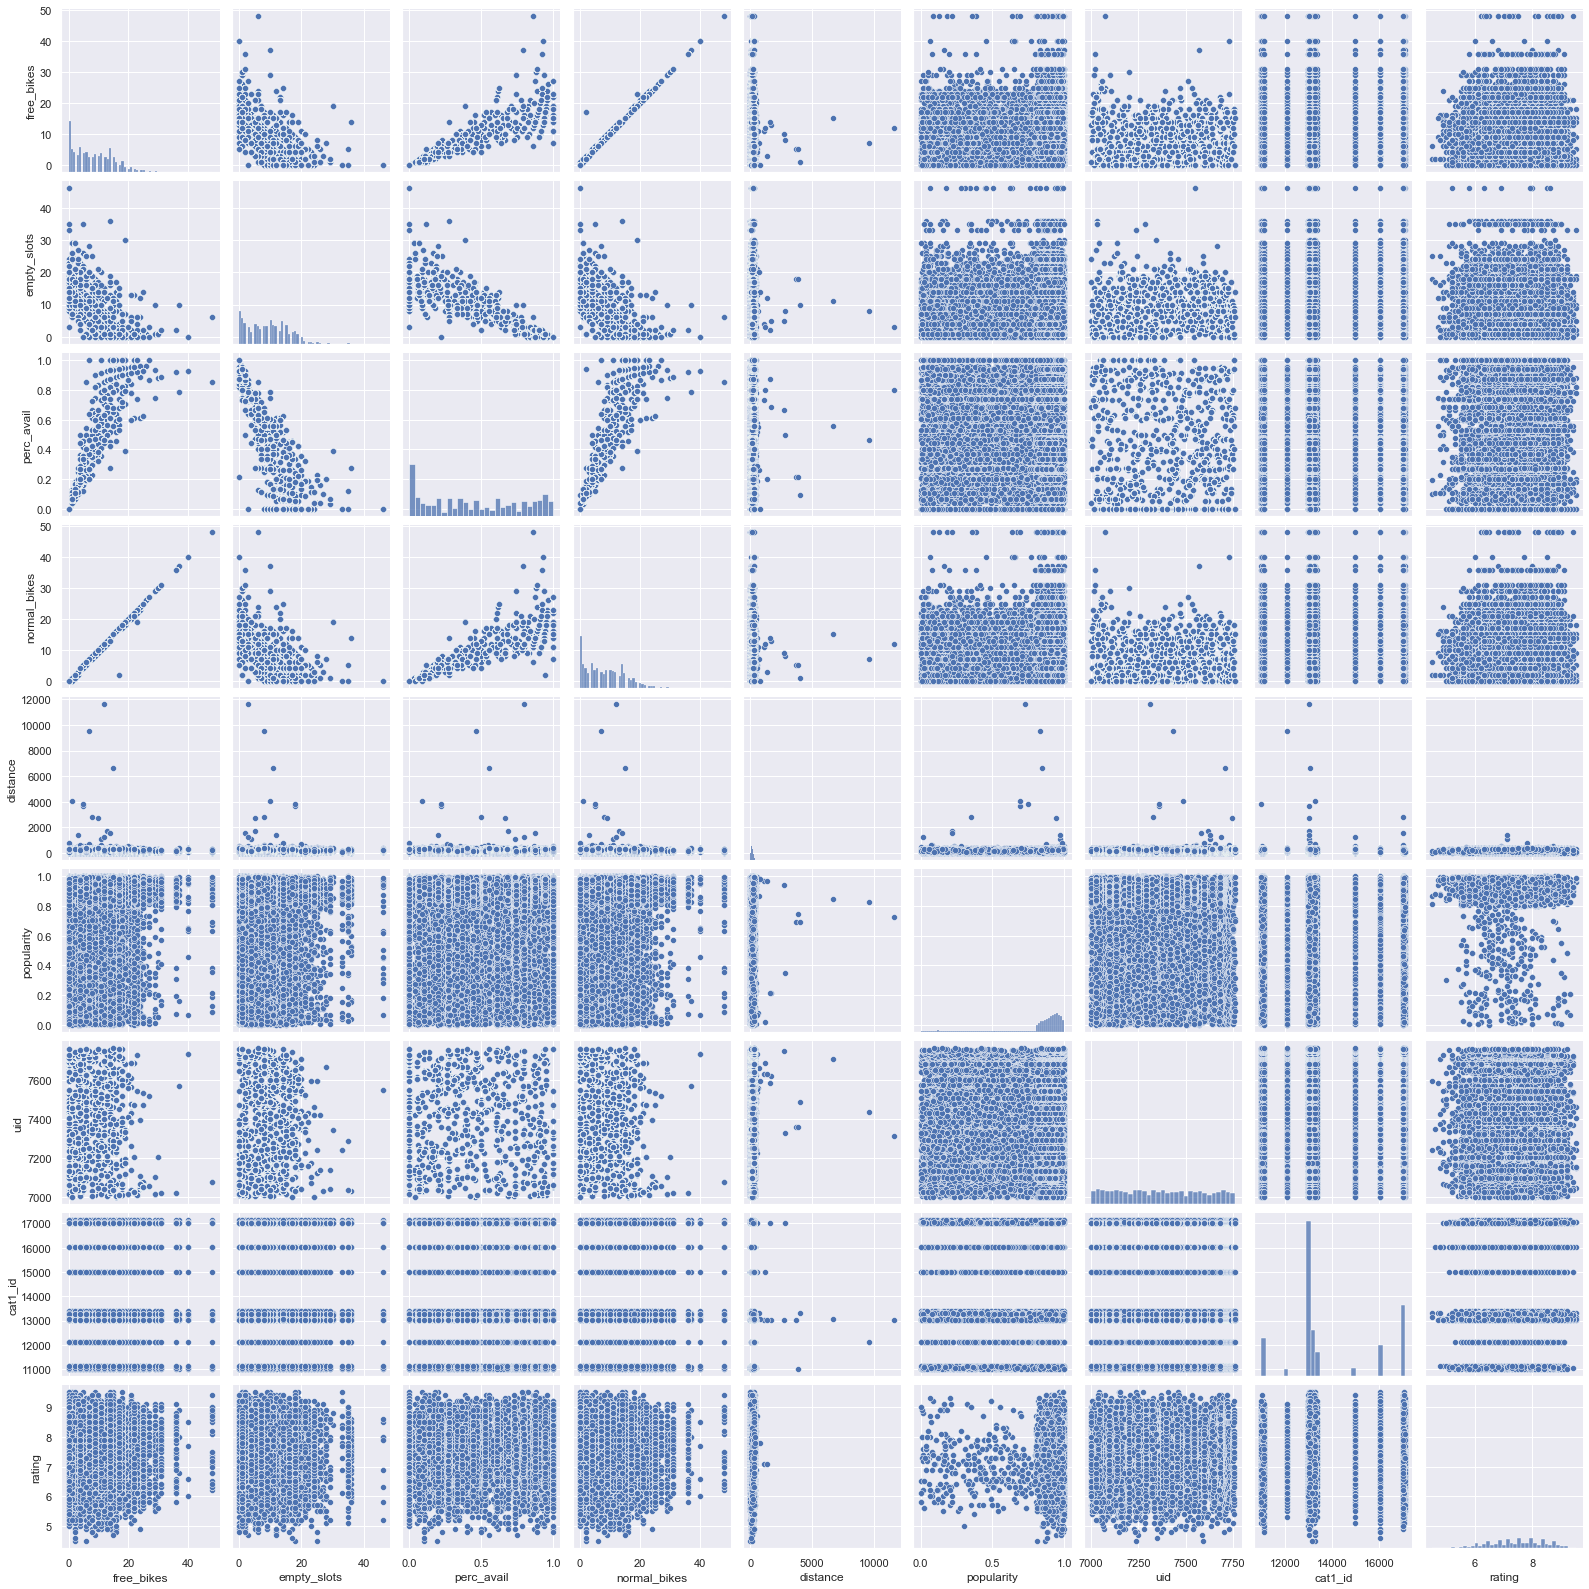

In [404]:
df = dff[['free_bikes', 'empty_slots', 'perc_avail', 'normal_bikes', 'distance', 'popularity', 'uid', 'cat1_id', 'rating']]

sns.pairplot(data=df)
plt.show()

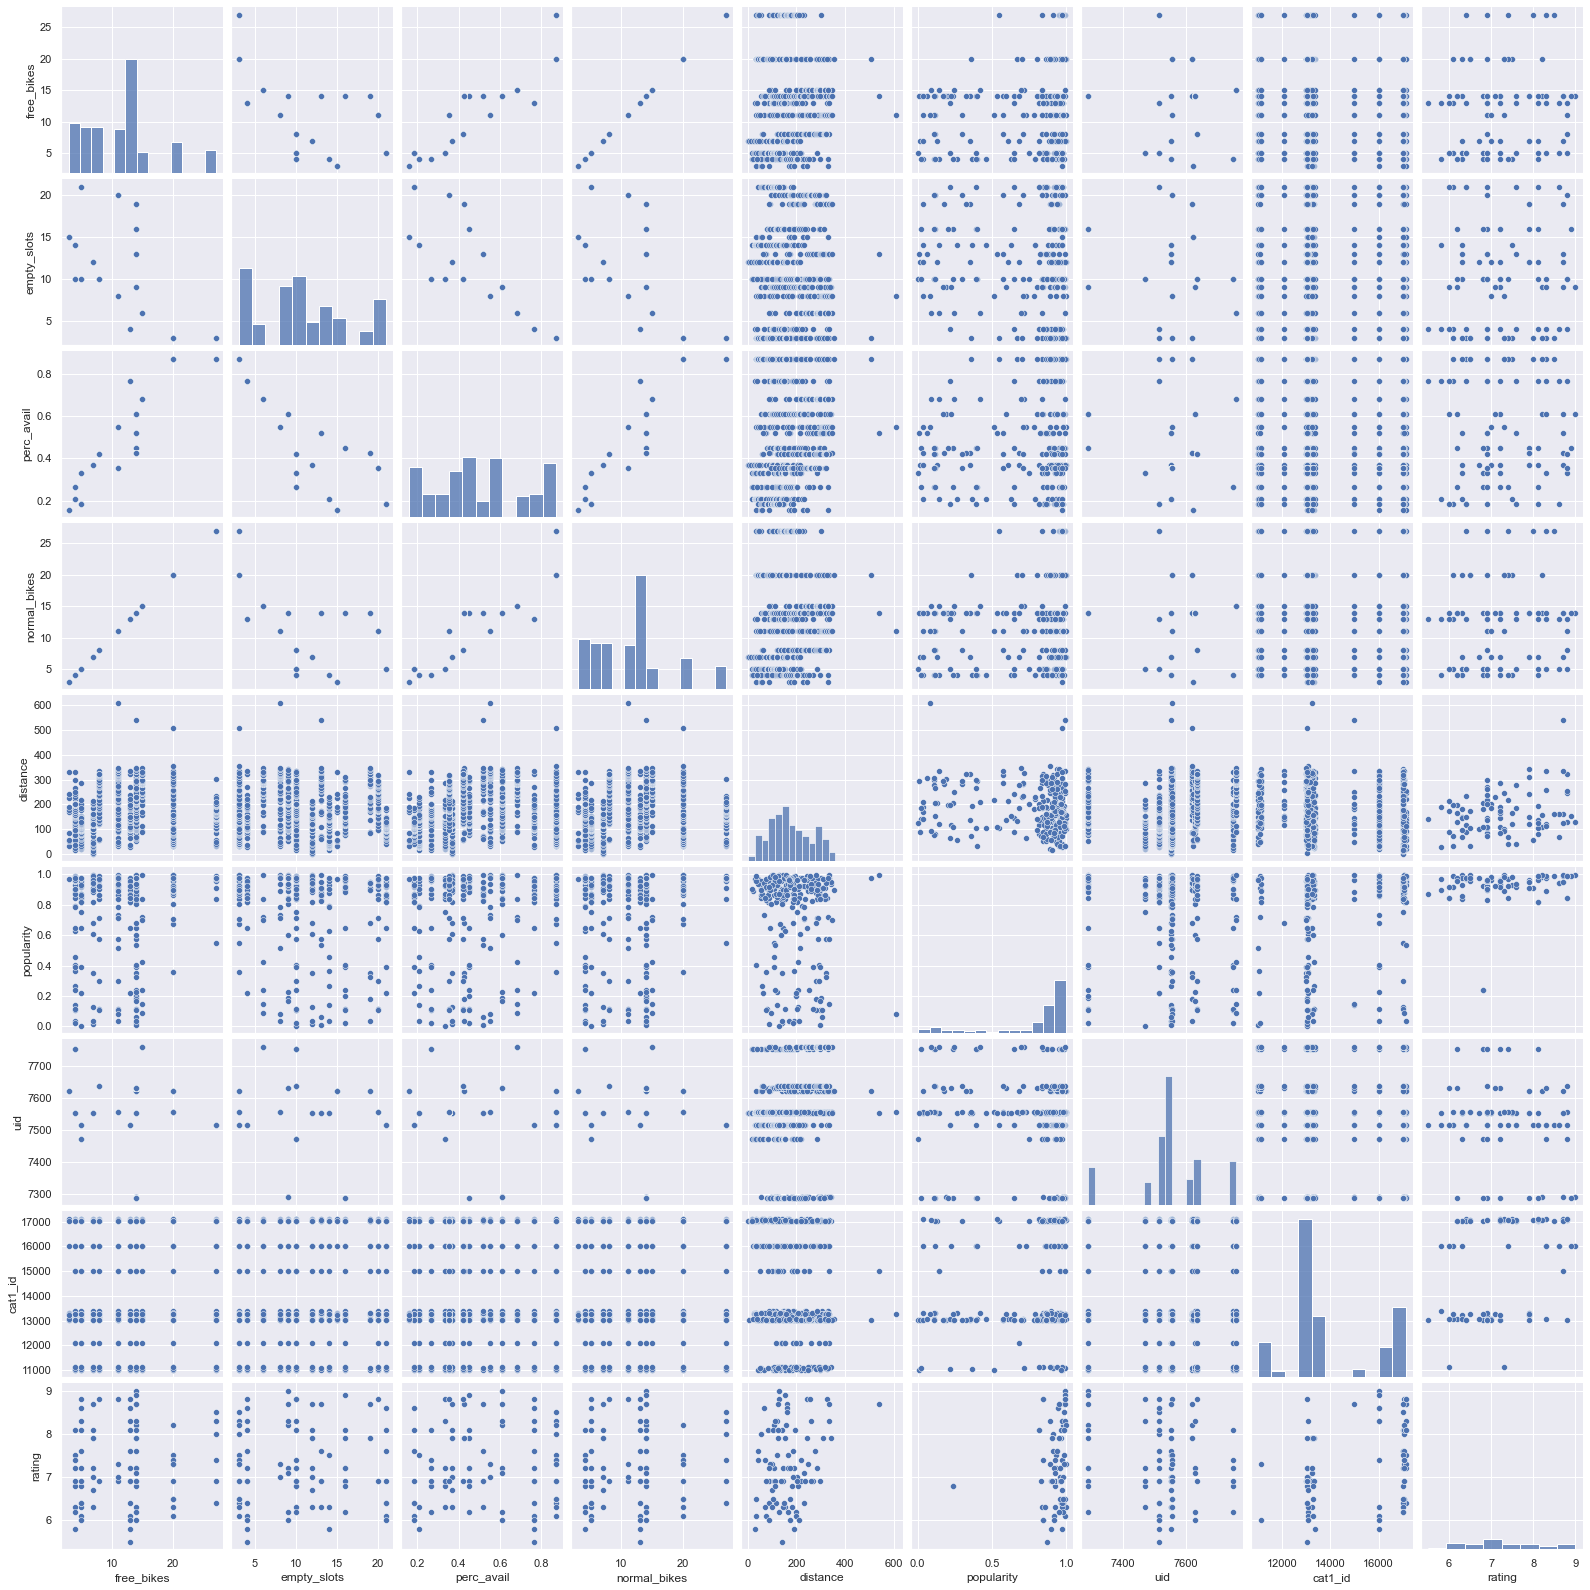

In [405]:

df_swPark = df[df['uid'].isin(swPark)]
df_uni = df[df['uid'].isin(uni)]
df_uniCoffee = df_uni[df_uni['cat1_id']==13035]

sns.pairplot(data=df_swPark)
plt.show()

In [406]:
# df_swPark.head()
swPark_dff = dff[dff['uid'].isin(swPark)]
print(swPark_dff.shape)
swPark_dff.head()

(819, 19)


free_bikes  empty_slots  slots  altitude  ebikes  normal_bikes  \
11647          14            9     23       0.0       0            14   
11648          14            9     23       0.0       0            14   
11649          14            9     23       0.0       0            14   
11650          14            9     23       0.0       0            14   
11651          14            9     23       0.0       0            14   

       renting  returning   uid Updated                     name  distance  \
11647        1          1  7289   1824h     Sheldon Lookout Rock       108   
11648        1          1  7289   1824h  Humber River Footbridge       130   
11649        1          1  7289   1824h   Humber Bay Arch Bridge       161   
11650        1          1  7289   1824h       Palace Place Foods        55   
11651        1          1  7289   1824h                Nice Maid        96   

       popularity  open_now  rating                      my_timestamp  \
11647    0.978742     False     8.2  2022-12-05 11:34:36.417625-05:00   
11648    0.994978     False     9.0  2022-12-05 11:34:36.417646-05:00   
11649    0.988400     False     8.7  2022-12-05 11:34:36.417655-05:00   
11650    0.843103      True     NaN  2022-12-05 11:34:36.417662-05:00   
11651         NaN      True     NaN  2022-12-05 11:34:36.417669-05:00   

       cat1_id                  cat1_name  perc_avail  
11647  17065.0            Farmers' Market    0.608696  
11648  16037.0                 Playground    0.608696  
11649  17119.0              Bicycle Store    0.608696  
11650  13309.0  Middle Eastern Restaurant    0.608696  
11651  13276.0           Sushi Restaurant    0.608696

In [407]:


print(dff.shape)
print(dff.isna().sum())
dff.head(5)

(29955, 19)
free_bikes          0
empty_slots         0
slots               0
altitude          500
ebikes              0
normal_bikes        0
renting             0
returning           0
uid                 0
Updated             0
name                0
distance            0
popularity       9531
open_now            0
rating          19259
my_timestamp        0
cat1_id           590
cat1_name         590
perc_avail          0
dtype: int64


free_bikes  empty_slots  slots  altitude  ebikes  normal_bikes  renting  \
0          19            0     19       0.0       0            19        1   
1          19            0     19       0.0       0            19        1   
2          19            0     19       0.0       0            19        1   
3          19            0     19       0.0       0            19        1   
4          19            0     19       0.0       0            19        1   

   returning   uid Updated                        name  distance  popularity  \
0          1  7303   1824h  Leslieville Farmers Market        40    0.868580   
1          1  7303   1824h                  McDonald's        62    0.995501   
2          1  7303   1824h     Jonathan Ashbridge Park        63    0.952623   
3          1  7303   1824h      Ashdale Medical Centre        73    0.575147   
4          1  7303   1824h                 Chick-N-Joy       129    0.035783   

   open_now  rating                      my_timestamp  cat1_id  \
0     False     8.6  2022-12-05 11:31:42.842959-05:00  17065.0   
1      True     7.4  2022-12-05 11:31:42.842978-05:00  16037.0   
2     False     NaN  2022-12-05 11:31:42.842985-05:00  17119.0   
3      True     NaN  2022-12-05 11:31:42.842992-05:00  13309.0   
4      True     6.9  2022-12-05 11:31:42.842999-05:00  13276.0   

                   cat1_name  perc_avail  
0            Farmers' Market         1.0  
1                 Playground         1.0  
2              Bicycle Store         1.0  
3  Middle Eastern Restaurant         1.0  
4           Sushi Restaurant         1.0

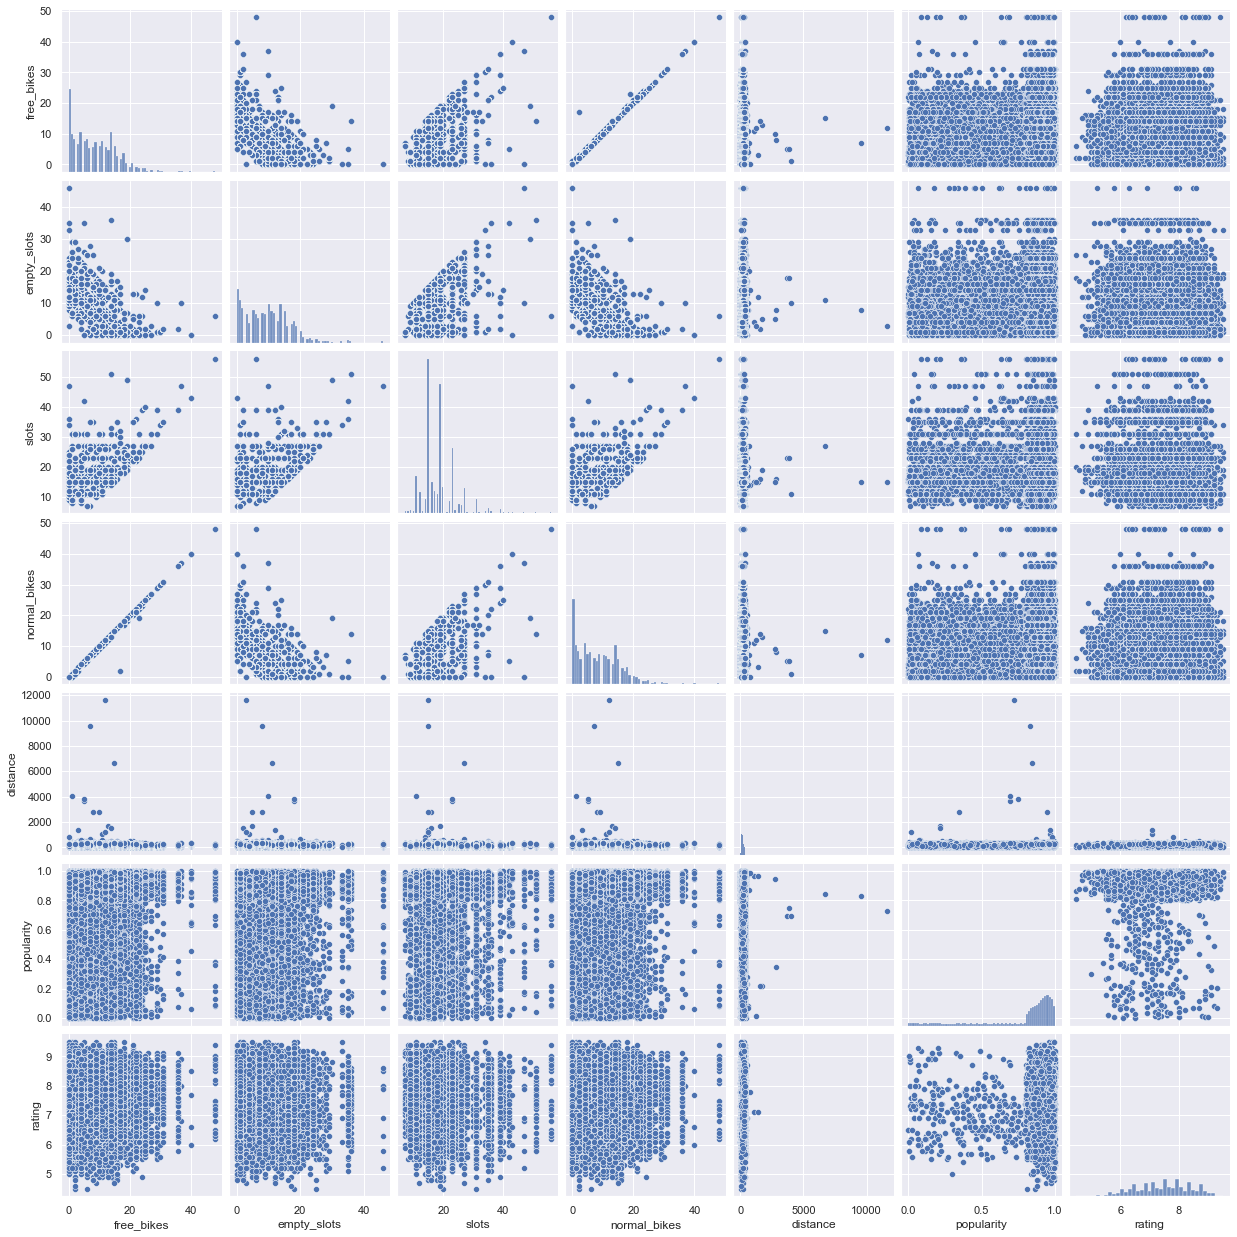

In [408]:
df = dff[['free_bikes', 'empty_slots', 'slots', 'normal_bikes', 'distance', 'popularity', 'rating']]
sns.pairplot(data=df)
plt.show()

Provide model output and an interpretation of the results. 

In [409]:
dff = dff.drop(['renting', 'returning', 'Updated', 'my_timestamp', 'ebikes', 'altitude'], axis=1)
# dff = dff.drop(['ebikes', 'altitude'], axis=1)
dff = dff[dff['open_now']==True]

In [410]:
dff = dff[dff['distance']<400]
dff.columns
dff=dff[['uid'
, 'free_bikes'
, 'empty_slots'
, 'slots'
, 'perc_avail'
, 'distance'
, 'open_now'
, 'cat1_id'
, 'cat1_name'
, 'name'
, 'rating'
, 'popularity']]

In [411]:
dff = dff[dff.columns[~dff.columns.isin(['open_now'])]]
dff.head()

uid  free_bikes  empty_slots  slots  perc_avail  distance  cat1_id  \
1   7303          19            0     19         1.0        62  16037.0   
3   7303          19            0     19         1.0        73  13309.0   
4   7303          19            0     19         1.0       129  13276.0   
6   7303          19            0     19         1.0       186  13059.0   
12  7303          19            0     19         1.0        73  13263.0   

                    cat1_name                         name  rating  popularity  
1                  Playground                   McDonald's     7.4    0.995501  
3   Middle Eastern Restaurant       Ashdale Medical Centre     NaN    0.575147  
4            Sushi Restaurant                  Chick-N-Joy     6.9    0.035783  
6                   Juice Bar                    Velotique     8.0    0.968785  
12        Japanese Restaurant  Natale and Scott Architects     NaN         NaN

<AxesSubplot: >

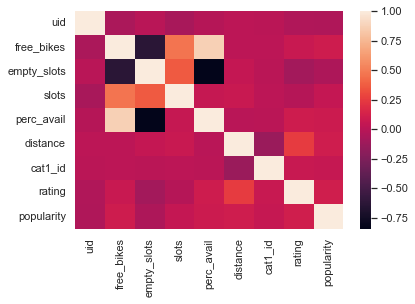

In [412]:
sns.heatmap(dff.corr())

In [413]:
dff.corr()

uid  free_bikes  empty_slots     slots  perc_avail  \
uid          1.000000   -0.060947    -0.003315 -0.074930   -0.020910   
free_bikes  -0.060947    1.000000    -0.640006  0.460370    0.868998   
empty_slots -0.003315   -0.640006     1.000000  0.360745   -0.842281   
slots       -0.074930    0.460370     0.360745  1.000000    0.053837   
perc_avail  -0.020910    0.868998    -0.842281  0.053837    1.000000   
distance     0.013924    0.013193     0.047716  0.065340   -0.001235   
cat1_id      0.003404    0.007614     0.003173  0.012239    0.002434   
rating      -0.041970    0.068378    -0.097087 -0.017515    0.088289   
popularity  -0.050274    0.088591    -0.055217  0.047635    0.081325   

             distance   cat1_id    rating  popularity  
uid          0.013924  0.003404 -0.041970   -0.050274  
free_bikes   0.013193  0.007614  0.068378    0.088591  
empty_slots  0.047716  0.003173 -0.097087   -0.055217  
slots        0.065340  0.012239 -0.017515    0.047635  
perc_avail  -0.001235  0.002434  0.088289    0.081325  
distance     1.000000 -0.133706  0.248246    0.097920  
cat1_id     -0.133706  1.000000  0.061106    0.055290  
rating       0.248246  0.061106  1.000000    0.106495  
popularity   0.097920  0.055290  0.106495    1.000000

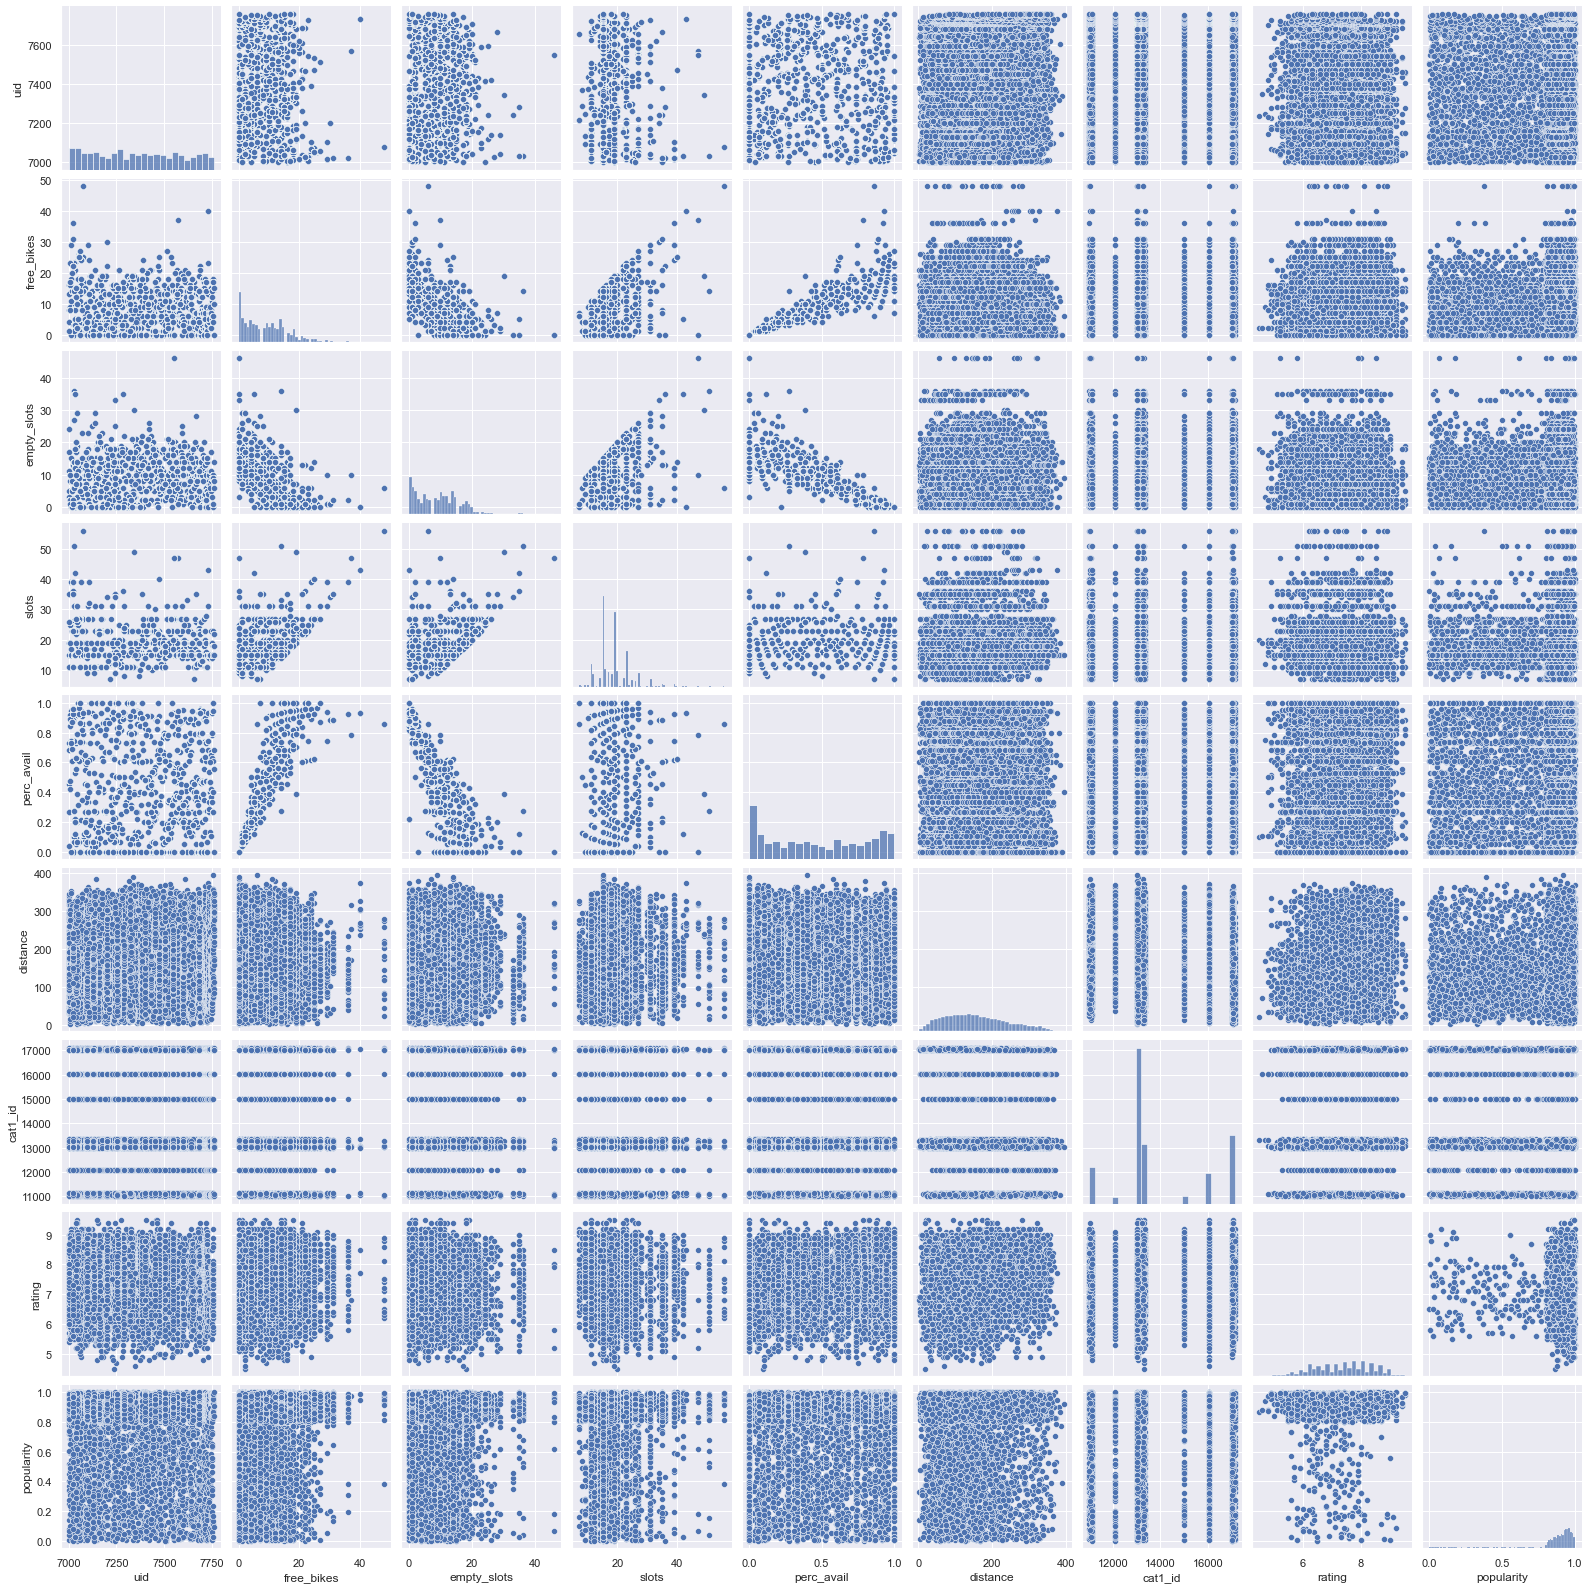

In [414]:
sns.pairplot(data=dff)
plt.show()

In [415]:
dff = dff.drop(['name', 'cat1_name'], axis=1)
dff.isna().sum()

uid               0
free_bikes        0
empty_slots       0
slots             0
perc_avail        0
distance          0
cat1_id         301
rating         7138
popularity     3004
dtype: int64

In [416]:
dff.shape
dff=dff.dropna(subset=['cat1_id'])
dff['rating'] = dff['rating'].fillna(0)
dff['popularity'] = dff['rating'].fillna(0)
dff.shape

(14405, 9)

In [417]:
dff.head()

uid  free_bikes  empty_slots  slots  perc_avail  distance  cat1_id  \
1   7303          19            0     19         1.0        62  16037.0   
3   7303          19            0     19         1.0        73  13309.0   
4   7303          19            0     19         1.0       129  13276.0   
6   7303          19            0     19         1.0       186  13059.0   
12  7303          19            0     19         1.0        73  13263.0   

    rating  popularity  
1      7.4         7.4  
3      0.0         0.0  
4      6.9         6.9  
6      8.0         8.0  
12     0.0         0.0

In [418]:
import statsmodels.api as sm

#run full model
y = dff['perc_avail']
X = dff.drop('perc_avail', axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             perc_avail   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.029e+04
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:05:50   Log-Likelihood:                 12498.
No. Observations:               14405   AIC:                        -2.498e+04
Df Residuals:                   14397   BIC:                        -2.492e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3147      0.030     10.638      

In [419]:
dff_sns = dff.copy()
dff = dff[dff.columns[~dff.columns.isin(['cat1_id'])]]

In [420]:
#run model without category id
y = dff['perc_avail']
X = dff.drop('perc_avail', axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             perc_avail   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.367e+04
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:05:50   Log-Likelihood:                 12498.
No. Observations:               14405   AIC:                        -2.498e+04
Df Residuals:                   14398   BIC:                        -2.493e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3149      0.029     10.850      

So...

## CONCLUSION:

there is a statistically significant strong negative linear relationship between the percent of bikes which are available, and the number of total bike slots per station site, and a strong positive linear relationship between the percent of bikes available and the number of available bikes.

# Stretch

How can you turn the regression model into a classification model?

umm...

...As a punishment for assigning me bum-data to work with; no. 


I mean....

bike share networks in December!... 

...really!?.  

I'm taking a nap before presentation instead.  

But you CAN check out all the pretty pictures I made for you below. =D

In [421]:
dff_sns = dff_sns[dff_sns.columns[~dff_sns.columns.isin(['distance', 'rating', 'popularity', 'uid'])]]


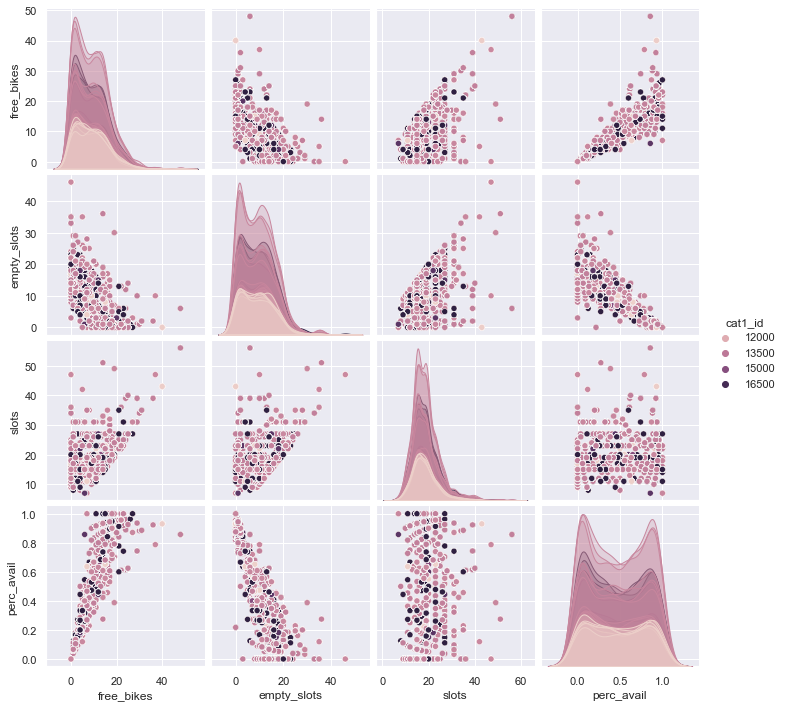

In [422]:

sns.set_theme(context='notebook', palette="muted")
sns.pairplot(data=dff_sns, hue='cat1_id')

In [424]:
import pandas_profiling

pandas_profiling.ProfileReport(dff)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]